Please submit an electronic version of your Python Jupyter notebook on NYU Brightspace. Remember that this assignment is to be done individually. Solutions will be posted a few days after the due date (on Feb 20th), so assignments submitted until that day will receive a late penalty, but no late assignments will be accepted after the solutions are posted.

Total points for this HW: 10

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10%)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3%)

#### Answer:

(1) Describle a urban prediction problem

topic: Decision tree models in predicting urban water quality

model: In this model, the parameters of acidity, electrical conductivity, total dissolved solids, ammonia, temperature, sulfate, dissolved oxygen, and phosphorus have been used. By analyzing this, the government could formulate policies to address the significant factors and mitigate water pollution. Therefore, each variable and their coefficient matters.


(2) Which is preferable, decision trees or random forests? Please explain the reason.

choice: This model is preferable to use decision trees. 

reason: Because the model is mainly used to explain the variables that influence water quality rather than predicting the future trend of water quality. Also, assessing surface water quality parameters is costly and time-consuming. Dicision trees can use just a few parameters to predict while random forest cannot.
____________________________________________________________________________________________________________

b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3%)

(1) Describle a urban prediction problem

topic: predict the population distributions

model: a two-level random forest method is proposed. The first-level random forest model is used to model the census variable and the covariables, and the second-level model is further applied to address the error term. By using this two-level model, population distribution can be predicted in urban functional zones identified based on an area-weighted POI proportion. 


(2) Which is preferable, decision trees or random forests? Please explain the reason.

choice: The model is preferable to use random forests.

reason: For the efficient allocation of tourism resources, the population distributions must be accurately predicted for government. Therefore, we do not care about which factors influence population distributions; instead, we focus on predicting the future trends of population distributions.
____________________________________________________________________________________________________________

c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4%)

One way of getting some interpretability out of the model by post-processing:( Domingos's work)

Domingos introduces a meta-learner called CMM. Initially, we generate a training set comprising a substantial number of examples generated and classified based on the ensemble, in addition to the original examples. Next, utilizing the C4.5RULES base learner, we employ bagging as the multiple-model methodology to analyze the refined training set.
____________________________________________________________________________________________________________

###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been modified, so you may get a different tree than the one shown in the lecture notes.  (30%)

In [1]:
import pandas as pd
import numpy as np
import os
os.environ["PATH"] += os.pathsep + 'D:/Users/Desktop/Graphviz/bin/'
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score
from pyecharts import options as opts
from pyecharts.charts import Tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
import io
thefile = io.StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\ngood,4,93,light')
df = pd.read_csv(thefile)
df.head()

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium


### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2%)

In [3]:
df.MPG.unique()

array(['good', 'bad'], dtype=object)

In [4]:
good_count = int(df['MPG'].value_counts()['good'])
bad_count= int(df['MPG'].value_counts()['bad'])

In [5]:
if good_count>bad_count:
    print("The most common MPG value is good_count")
elif good_count < bad_count:
    print("The most common MPG value is bad_count")
else:
    print("The numbers of per kind of MPG value are the same")     

The most common MPG value is bad_count


In [6]:
def InformationGain(goodY, badY, goodN, badN):
    def F(X, Y):
        val1 = X * np.log2(1. * (X + Y) / X) if X > 0 else 0
        val2 = Y * np.log2(1. * (X + Y) / Y) if Y > 0 else 0
        return val1 + val2

    total = goodY + goodN + badY + badN
    if total == 0:
        return 0
    else:
        return (F(goodY + goodN, badY + badN) - F(goodY, badY) - F(goodN, badN)) / total

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5%)

In [7]:
good=df[df['MPG']=='good']
bad=df[df['MPG']=='bad']

In [8]:
# cylinders
df['cylinders'].value_counts()

cylinders
4    9
6    6
8    5
Name: count, dtype: int64

In [9]:
# cylinders=4
cylinders=(4,6,8)
for i in cylinders:
    if i in good['cylinders'].value_counts():
        goodY = int(good['cylinders'].value_counts()[i])
    else:
            goodY = 0
    goodN=int(good['cylinders'].value_counts().sum()) - int(goodY)
    
    if i in bad['cylinders'].value_counts():
        badY = int(bad['cylinders'].value_counts()[i])
    else:
        badY = 0
    badN=int(bad['cylinders'].value_counts().sum()) - int(badY)
    IG_C=InformationGain(goodY,badY,goodN,badN)
    print("when split is cylinders = {}, InformationGain = {}" .format(i,IG_C))

when split is cylinders = 4, InformationGain = 0.4680577739061723
when split is cylinders = 6, InformationGain = 0.1916312040067166
when split is cylinders = 8, InformationGain = 0.15307795338969116


In [10]:
# weight
df['weight'].value_counts()

weight
medium     8
light      6
weighty    6
Name: count, dtype: int64

In [11]:
# 
weight = ("light", "medium", "weighty")
for i in weight:
    goodY = 0
    goodN = 0
    badY = 0
    badN = 0
    for w in good['weight']:
        if w == i:
            goodY += 1
        else:
            goodN += 1
        
    for w in bad['weight']:
        if w == i:
            badY += 1
        else:
            badN += 1
    
    IG = InformationGain(goodY, badY, goodN, badN)
    print("when split is weight = {}, InformationGain = {}".format(i, IG))

when split is weight = light, InformationGain = 0.1916312040067166
when split is weight = medium, InformationGain = 0.0058021490143458365
when split is weight = weighty, InformationGain = 0.1916312040067166


c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5%) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [12]:
# sort
HP=df.sort_values(by='HP')
# find the midpoints
midpoints = (HP['HP'].shift(1) + HP['HP'].shift(0)) / 2
HP['midpoints'] = midpoints
HP.head()

,MPG,cylinders,HP,weight,midpoints
15,good,4,65,light,NaN
0,good,4,75,light,70.0
17,good,4,81,light,78.0
16,bad,6,85,medium,83.0
14,good,4,89,medium,87.0


In [13]:
# compute the information gain
HP['IG'] = 0

for i in HP['midpoints']:
    goodHP_Y = (good['HP'] <= i).sum()
    goodHP_N = (good['HP'] > i).sum()
    badHP_Y = (bad['HP'] <= i).sum()
    badHP_N = (bad['HP'] > i).sum()
    IG = InformationGain(goodHP_Y, badHP_Y, goodHP_N, badHP_N)
    HP.loc[HP['midpoints'] == i, 'IG'] = IG
HP.head()

,MPG,cylinders,HP,weight,midpoints,IG
15,good,4,65,light,NaN,0.000000
0,good,4,75,light,70.0,0.091390
17,good,4,81,light,78.0,0.193507
16,bad,6,85,medium,83.0,0.309840
14,good,4,89,medium,87.0,0.162065


In [14]:
max_IG= HP['IG'].max()
max_IG_index = HP['IG'].idxmax() 
right_split = HP.loc[max_IG_index, 'midpoints']
print("The max information gain is "+ str(max_IG))
print("The situable split is " + str(right_split))

The max information gain is 0.5567796494470395
The situable split is 93.5


In [15]:
# HP
goodY = good['HP'].value_counts().loc[lambda x: x.index <= 93.5].sum()
goodN = good['HP'].value_counts().loc[lambda x: x.index > 93.5].sum()
badY = bad['HP'].value_counts().loc[lambda x: x.index <= 93.5].sum()
badN = bad['HP'].value_counts().loc[lambda x: x.index > 93.5].sum()
print("The number of 'good' MPG vehicles whose HP <= 93.5 is : " + str(goodY))
print("The number of 'good' MPG vehicles whose HP > 93.5 is : " + str(goodN))
print("The number of 'bad' MPG vehicles whose HP <= 93.5 is : " + str(badY))
print("The number of 'bad' MPG vehicles whose HP <= 93.5 is : " + str(badN))

InformationGain(goodY,badY,goodN,badN)

The number of 'good' MPG vehicles whose HP <= 93.5 is : 6
The number of 'good' MPG vehicles whose HP > 93.5 is : 0
The number of 'bad' MPG vehicles whose HP <= 93.5 is : 2
The number of 'bad' MPG vehicles whose HP <= 93.5 is : 12


0.5567796494470395

d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4%)

##### Answer:
I think "HP >= 93.5" is the optimal binary because it gives us the max information gain.

The split "HP>=93.5" creates "Bad" and 'Good or bad" child nodes, the "Good or bad" child node requires futher partitioning.

It is because when HP>=93.5, the MPG vehicles are definite bad. When HP <93.5, there are both good and bad vehicles.

———————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————

e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6%)

In [16]:
# see the siutation of the child node
# HP>=93.5
HP_BIG=df[df['HP']>=93.5]
HP_BIG['MPG'].value_counts()
# from the result, we can see that when HP>=93.5, we don't need to splite this child node anymore.

MPG
bad    12
Name: count, dtype: int64

In [17]:
HP_small=df[df['HP']<93.5]
HP_small
# From the result, we can see that we still need to classify the child node

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
11,good,4,92,medium
14,good,4,89,medium
15,good,4,65,light
16,bad,6,85,medium
17,good,4,81,light
19,good,4,93,light


In [18]:
good_HP_S=HP_small[HP_small['MPG']=='good']
bad_HP_S=HP_small[HP_small['MPG']=='bad']

In [19]:
# There are seversal different ways, let's try them one by one.
print(HP_small['cylinders'].value_counts())
print(HP_small['weight'].value_counts())

cylinders
4    6
6    2
Name: count, dtype: int64
weight
light     4
medium    4
Name: count, dtype: int64


In [20]:
# cylinders
cylinders=(4,6)
for i in cylinders:
    if i in good_HP_S['cylinders'].value_counts():
        goodY = int(good_HP_S['cylinders'].value_counts()[i])
    else:
            goodY = 0
    goodN=int(good_HP_S['cylinders'].value_counts().sum()) - int(goodY)
    
    if i in bad_HP_S['cylinders'].value_counts():
        badY = int(bad_HP_S['cylinders'].value_counts()[i])
    else:
        badY = 0
    badN=int(bad_HP_S['cylinders'].value_counts().sum()) - int(badY)
    IG_C=InformationGain(goodY,badY,goodN,badN)
    print("when split is cylinders = {}, InformationGain = {}" .format(i,IG_C))

when split is cylinders = 4, InformationGain = 0.8112781244591328
when split is cylinders = 6, InformationGain = 0.8112781244591328


In [21]:
# weight
weight = ("light", "medium")
for i in weight:
    goodY=0
    goodN=0
    badY=0
    badN=0

    for w in good_HP_S['weight']:
        if w == i:
            goodY += 1
        else:
            goodN += 1
        
    for w in bad_HP_S['weight']:
        if w == i:
            badY += 1
        else:
            badN += 1
    
    IG = InformationGain(goodY, badY, goodN, badN)
    print("when split is weight = {}, InformationGain = {}".format(i, IG))

when split is weight = light, InformationGain = 0.31127812445913283
when split is weight = medium, InformationGain = 0.31127812445913283


In [22]:
# HP
HP1=HP_small.sort_values(by='HP')
# find the midpoints
midpoints1 = (HP1['HP'].shift(1) + HP1['HP'].shift(0)) / 2
HP1['midpoints'] = midpoints1
HP1.head()

,MPG,cylinders,HP,weight,midpoints
15,good,4,65,light,NaN
0,good,4,75,light,70.0
17,good,4,81,light,78.0
16,bad,6,85,medium,83.0
14,good,4,89,medium,87.0


In [23]:
# compute the information gain
HP1['IG'] = 0

for i in HP1['midpoints']:
    goodHP_Y = (good_HP_S['HP'] <= i).sum()
    goodHP_N = (good_HP_S['HP'] > i).sum()
    badHP_Y = (bad_HP_S['HP'] <= i).sum()
    badHP_N = (bad_HP_S['HP'] > i).sum()
    IG = InformationGain(goodHP_Y, badHP_Y, goodHP_N, badHP_N)
    HP1.loc[HP1['midpoints'] == i, 'IG'] = IG
HP1.head()

,MPG,cylinders,HP,weight,midpoints,IG
15,good,4,65,light,NaN,0.000000
0,good,4,75,light,70.0,0.056048
17,good,4,81,light,78.0,0.122556
16,bad,6,85,medium,83.0,0.204434
14,good,4,89,medium,87.0,0.000000


In [24]:
max_IG1= HP1['IG'].max()
max_IG_index1 = HP1['IG'].idxmax() 
right_split1 = HP1.loc[max_IG_index1, 'midpoints']
print("The max information gain is "+ str(max_IG1))
print("The situable split is " + str(right_split1))

The max information gain is 0.20443400292496483
The situable split is 83.0


In [25]:
# According to the Information Gain, I choose "cylinders = 4" as the split.
# Check if need more child node
HP_small_C4=HP_small[HP_small['cylinders']==4]
HP_small_C4

,MPG,cylinders,HP,weight
0,good,4,75,light
11,good,4,92,medium
14,good,4,89,medium
15,good,4,65,light
17,good,4,81,light
19,good,4,93,light


In [26]:
HP_small_not_C4=HP_small[HP_small['cylinders']!=4]
HP_small_not_C4

,MPG,cylinders,HP,weight
1,bad,6,90,medium
16,bad,6,85,medium


In [27]:
#As we can see, HP>=93.5 and cylinders==4 is situable split. we don't need more child node.

f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4%)

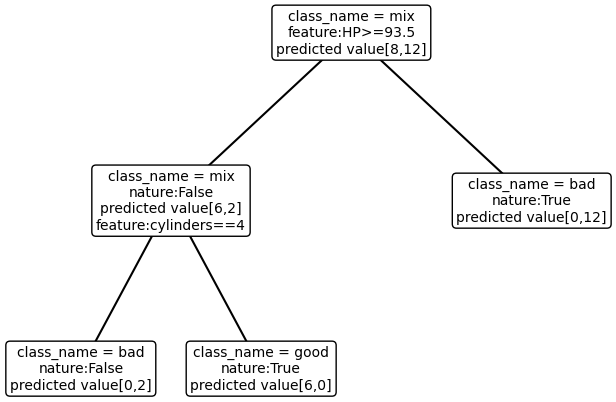

In [28]:
nodes = [(0.5, 1, 'class_name = mix\nfeature:HP>=93.5\npredicted value[8,12]'), 
         (0.3, 0.7, 'class_name = mix\nnature:False\npredicted value[6,2]\nfeature:cylinders==4'), 
         (0.7, 0.7, 'class_name = bad\nnature:True\npredicted value[0,12]'), 
         (0.2, 0.4, 'class_name = bad\nnature:False\npredicted value[0,2]'), 
         (0.4, 0.4, 'class_name = good\nnature:True\npredicted value[6,0]')]

edges = [((0.5, 1), (0.3, 0.7)), 
         ((0.5, 1), (0.7, 0.7)),
         ((0.3, 0.7), (0.2, 0.4)),
         ((0.3, 0.7), (0.4, 0.4)),]

for x, y, text in nodes:
    plt.text(x, y, text, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    
for (x1, y1), (x2, y2) in edges:
    plt.plot([x1, x2], [y1, y2], 'k-')

plt.axis('off')
plt.show()

g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4%)

MPG,cylinders,HP,weight

???,4,93,light

???,6,113,medium

???,4,83,weighty

???,6,70,weighty


car1: HP<=93.5 ---->  cylinders==4.0 ----> good

car2: HP>93.5  ----> bad

car3: HP<=93.5 ---->  cylinders==4.0 ----> good

car4: HP<=93.5 ---->  cylinders!=4.0 ----> bad

### Question 3, Predicting burden of disease （40%)

In [29]:
data=pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10%)

In [30]:
from sklearn.model_selection import train_test_split
# remove records with any missing values
data=data.dropna()

# Let's take "found.weapon" as the target variable. 
y=data.loc[:,"BurdenOfDisease"]

# Get the feature space.  We are using only features from before the stop, getting rid of features from during/after the stop like "arrested".
X=data.loc[:,"FrxnPeaceIn10":"FemaleLtrcyRate"]
X=pd.get_dummies(X)

# Split data into 70% train, 30% test
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)
print(X_train.head())

    FrxnPeaceIn10  ODA4H2OPcptaDol  RenewResm3PcptaYr  SustAccImprWatRur  \
7             1.0             0.00                 66            0.85149   
53            1.0             8.04             317000            0.82178   
15            1.0             4.19               9345            0.89109   
36            0.4             0.12              25183            0.28713   
12            1.0             2.87              45564            0.59406   

    SustAccImprWatUrb  SustAccImprSanRur  SustAccImprSanUrb  \
7             0.97030            0.99010            0.99010   
53            0.82178            0.59406            0.85149   
15            0.99010            0.24752            0.56436   
36            0.82178            0.22772            0.42574   
12            0.85149            0.69307            0.64356   

    TotHlthExpPctofGDP  GenGovtPctofTotHlthExp  ExtResHlthPctTotExpHlth  \
7                0.064                   0.475                    0.002   
53            

In [31]:
from sklearn.tree import DecisionTreeClassifier

# learn model
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

# in sample accuracy
print('In sample accuracy:',dt.score(X_train,y_train))

# out of sample accuracy
print('Out of sample accuracy:',dt.score(X_test,y_test))

In sample accuracy: 1.0
Out of sample accuracy: 0.6410256410256411


In [32]:
# your code here
OS=[]
for i in range(300):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = i)    
    dt = DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    OS.append(dt.score(X_test,y_test))
print(np.mean(OS))

0.6185470085470086


In [33]:
# Let's just use a single train/test split for this part:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3,random_state=999)
AUC_OS=[]
for i in range(2,500,25):
    dt=DecisionTreeClassifier(max_leaf_nodes=i)
    dt.fit(X_train,y_train)
    pred = dt.predict_proba(X_test)
    AUC_OS.append(roc_auc_score(np.array(y_test), pred, multi_class='ovr'))
AUC_OS

[0.7196544578853047,
 0.7506184395801332,
 0.7726422491039426,
 0.7702756976446492,
 0.752228542626728,
 0.7701496895801332,
 0.7704101062467998,
 0.7701496895801332,
 0.7328233006912442,
 0.7506184395801332,
 0.7704101062467998,
 0.7523545506912442,
 0.7702756976446492,
 0.7727682571684589,
 0.7506184395801332,
 0.7507444476446492,
 0.7523545506912442,
 0.7701496895801332,
 0.7507528481822836,
 0.7726422491039426]

b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10%)

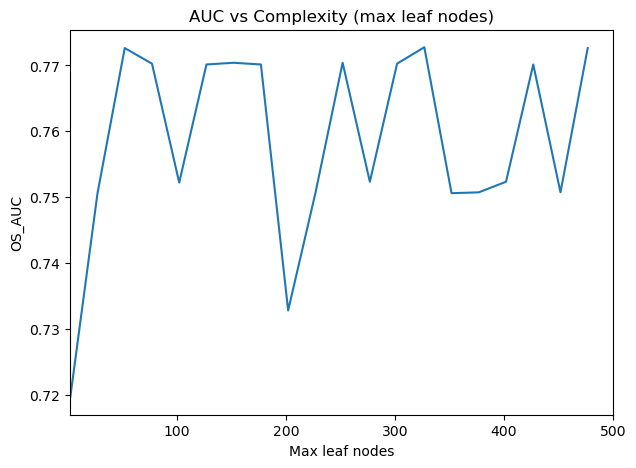

In [34]:
import matplotlib.pylab as plt
plt.figure(figsize=(7,5))
plt.plot(range(2,500,25),AUC_OS)
plt.xlabel("Max leaf nodes")
plt.ylabel("OS_AUC")
plt.title("AUC vs Complexity (max leaf nodes)")
plt.xlim(2,500)
plt.show()

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10%)

In [35]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
param_grid = {'max_leaf_nodes': range(2,200)}
dt = DecisionTreeClassifier()
scoring = make_scorer(roc_auc_score, average='macro', multi_class='ovo', needs_proba=True)
gr = GridSearchCV(dt, param_grid=param_grid, scoring=scoring)
rs = gr.fit(X_train, y_train)
print(rs.best_estimator_)
print(roc_auc_score(np.array(y_test), rs.predict_proba(X_test), multi_class='ovo', average='macro'))

DecisionTreeClassifier(max_leaf_nodes=7)
0.8201388888888889


d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (10%)

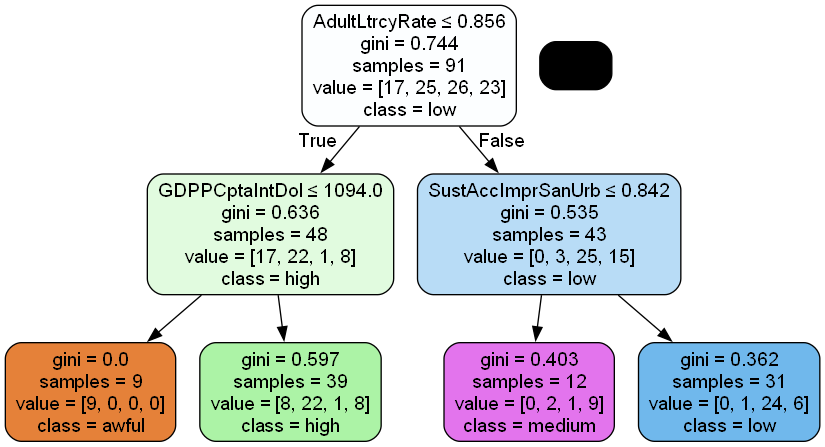

In [36]:
dt = DecisionTreeClassifier(max_leaf_nodes=7,max_depth = 2)
dt.fit(X_train,y_train)

dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X_train.columns, 
                           class_names=['awful', 'high', 'low', 'medium'],
                           filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Question 4, Fit a random forest to the data from question 3 (20%)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (10%)

In [37]:
# same training data as above
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, n_jobs=-1,max_leaf_nodes=10)
rf.fit(X_train, y_train)
pred=rf.predict_proba(X_test)
print(roc_auc_score(np.array(y_test), pred, multi_class='ovo', average='macro'))

0.9150132275132276


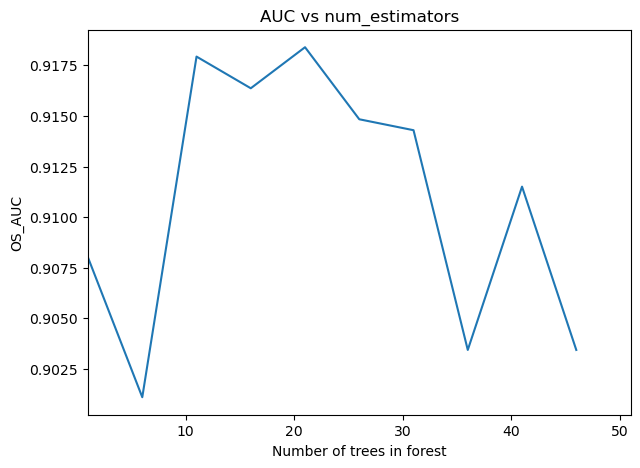

In [38]:
# your code here
AUC=[]
for i in range(1,51,5):
    rf = RandomForestClassifier(n_estimators=i, n_jobs=-1,max_leaf_nodes=10)
    rf = RandomForestClassifier(n_estimators=30, n_jobs=-1,max_leaf_nodes=10)
    rf.fit(X_train, y_train)
    pred=rf.predict_proba(X_test)
    AUC.append(roc_auc_score(np.array(y_test), pred, multi_class='ovo', average='macro'))

plt.figure(figsize=(7,5))
plt.plot(range(1,51,5),AUC)
plt.xlabel("Number of trees in forest")
plt.ylabel("OS_AUC")
plt.title("AUC vs num_estimators")
plt.xlim(1,51)
plt.show()

In [39]:
param_grid = {'n_estimators':range(1,51,5)}
rf = RandomForestClassifier(n_estimators=30, n_jobs=-1,max_leaf_nodes=10)
scoring = make_scorer(roc_auc_score, average='macro', multi_class='ovo', needs_proba=True)
gs = GridSearchCV(rf, param_grid=param_grid, scoring=scoring)
rs = gs.fit(X_train, y_train)
pred=rs.predict_proba(X_test)
print(rs.best_estimator_)
print(roc_auc_score(np.array(y_test), pred, multi_class='ovo', average='macro'))

RandomForestClassifier(max_leaf_nodes=10, n_estimators=26, n_jobs=-1)
0.905897266313933


The accuracy of random forest is 0.905.

The accuracy of decision tree is 0.820.

As we can see, the accuracy of random forest is larger.

b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10%)

Accuracy: The accuracy of Random Forest is larger than Decision Tree. This is because a random forest is usually an integrated model consisting of multiple decision trees. So through many training, the accuracy will be improved. Also, the decision tree selects a single feature at each node for partitioning, while the random forest selects a set of features for partitioning. By doing this, random forest could gain more information and improve its accuracy.

Interpretability: The interpretability of decision tree is better because it chooses single feature for partitioning. By doing this, decision tree model can explain the significant of each factor. At the same time, the random forest combine different factor. When we try to explain it, we may not know the significant of each factor.
